<a href="https://colab.research.google.com/github/Somtochukwu-Achikanu/ML-project/blob/main/marketing_campaign_responses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
responses = pd.read_csv('/content/campaign_responses.csv')
responses.head()

,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
0,1,35,Male,65000,720,Yes,Married,2,Yes
1,2,28,Female,45000,680,No,Single,0,No
2,3,42,Male,85000,750,Yes,Married,3,Yes
3,4,31,Female,55000,710,Yes,Single,1,No
4,5,47,Male,95000,790,Yes,Married,2,Yes


## Basic Preprocessing: Checking for missing values and summary statistics

In [ ]:
#Checking for missing values
response = responses.isna().sum()
response

customer_id       0
age               0
gender            0
annual_income     0
credit_score      0
employed          0
marital_status    0
no_of_children    0
responded         0
dtype: int64

In [ ]:
print(responses.dtypes)

customer_id        int64
age                int64
gender            object
annual_income      int64
credit_score       int64
employed          object
marital_status    object
no_of_children     int64
responded         object
dtype: object


In [ ]:
#Summary Statistics
stat = responses.describe()
print(stat)

       customer_id        age  annual_income  credit_score  no_of_children
count    56.000000  56.000000      56.000000     56.000000       56.000000
mean     28.500000  36.214286   69017.857143    719.107143        1.285714
std      16.309506   7.088311   22784.756524     60.340753        1.186504
min       1.000000  25.000000   35000.000000    600.000000        0.000000
25%      14.750000  30.000000   48000.000000    677.500000        0.000000
50%      28.500000  35.500000   64500.000000    720.000000        1.000000
75%      42.250000  42.000000   90000.000000    770.000000        2.000000
max      56.000000  51.000000  110000.000000    820.000000        3.000000


In [ ]:
# Gender count
Gender = responses['gender'].value_counts()
Gender

gender
Male      28
Female    28
Name: count, dtype: int64

## Visualization

In [ ]:
!pip install streamlit

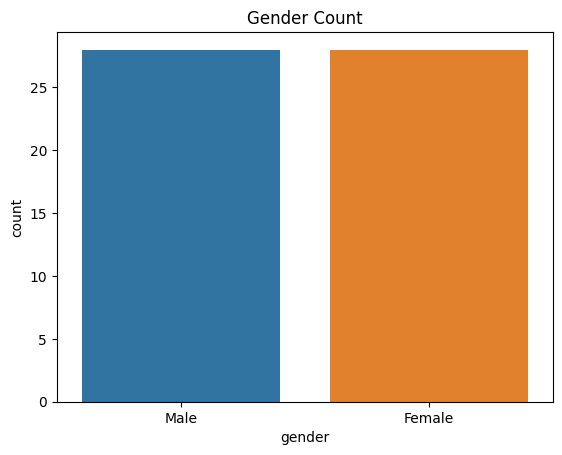

In [ ]:
#The number of male to females
sns.countplot(x = 'gender', data = responses, hue = 'gender')
plt.title('Gender Count')
plt.show()

In [ ]:
#which gender is mostly employed
employed_gender = responses.groupby('gender')['employed'].value_counts()
employed_gender

gender  employed
Female  Yes         15
        No          13
Male    Yes         28
Name: count, dtype: int64

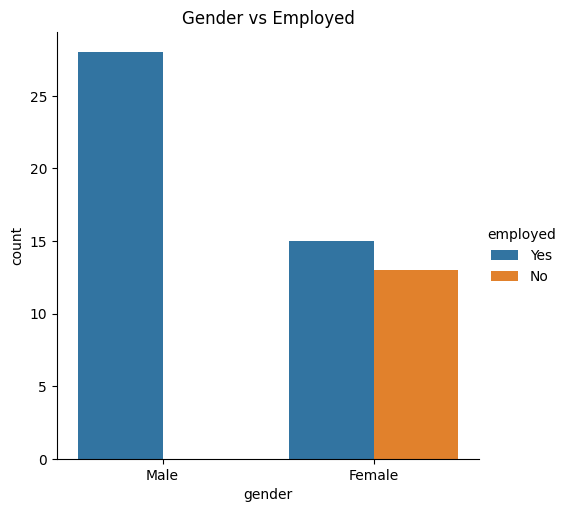

In [ ]:
sns.catplot(x='gender', hue='employed',kind='count',data=responses)
plt.title('Gender vs Employed')
plt.show()

In [ ]:
#Age visualization
age = responses['age']
age.sort_values(ascending=False)
age.head()

0    35
1    28
2    42
3    31
4    47
Name: age, dtype: int64

<Figure size 1500x600 with 0 Axes>

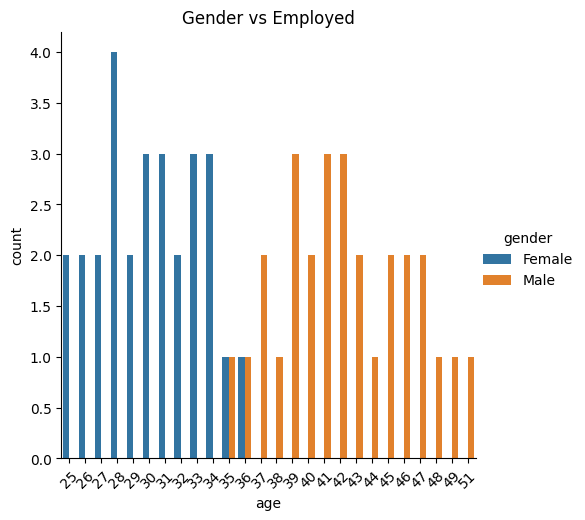

In [ ]:
#count plot of the ages by gender
plt.figure(figsize=(15,6))
sns.catplot(x='age', hue='gender',kind='count',data=responses)
plt.title('Gender vs Employed')
plt.xticks(rotation = 45)
plt.show()

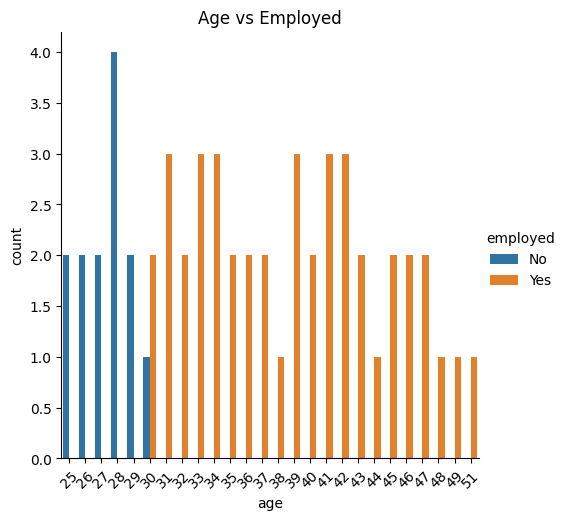

In [ ]:
#Age vs Employment
sns.catplot(x='age', hue='employed',kind='count',data=responses)
plt.title('Age vs Employed')
plt.xticks(rotation = 45)
plt.show()

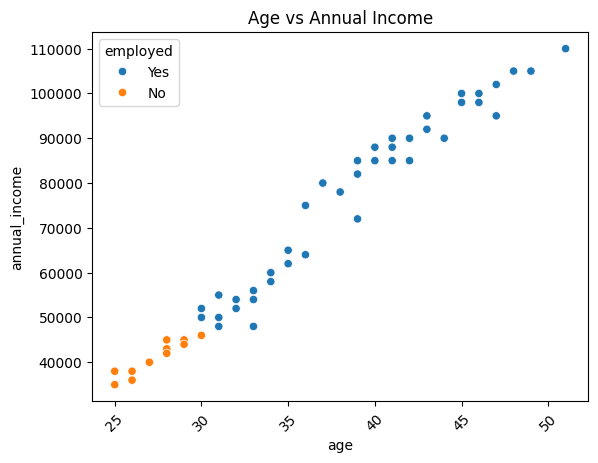

In [ ]:
#Age vs annual_Income
sns.scatterplot(x='age', y='annual_income', hue='employed', data=responses)
plt.title('Age vs Annual Income')
plt.xticks(rotation = 45)
plt.show()
plt.show()

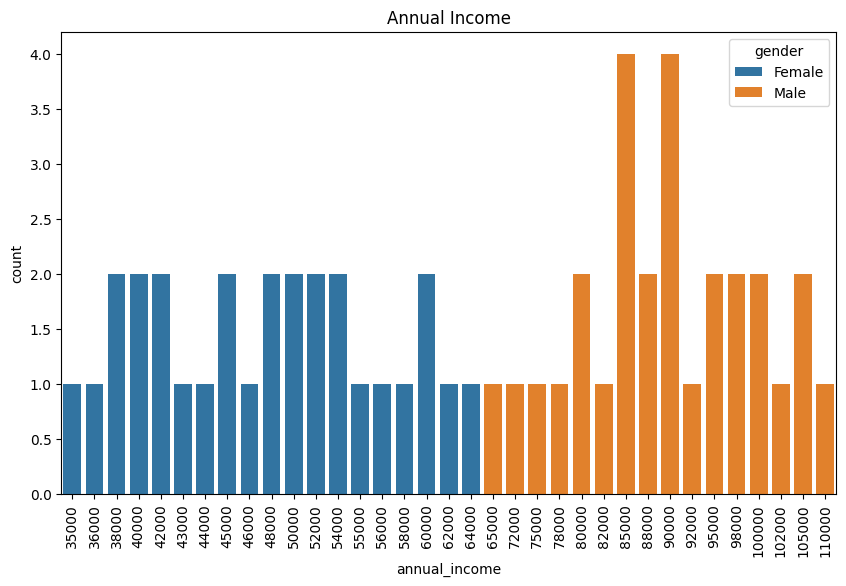

In [ ]:
#Highest annual income
figure = plt.figure(figsize = (10,6))
sns.countplot(x = 'annual_income', data = responses,hue='gender')
plt.title('Annual Income')
plt.xticks(rotation = 90)
plt.show()

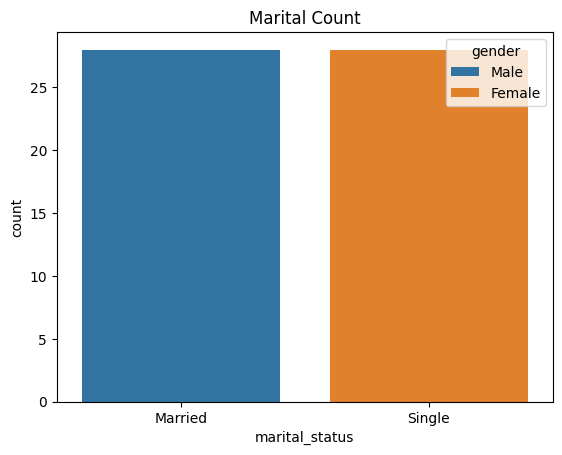

In [ ]:
#Number of married
sns.countplot(x = 'marital_status', data = responses, hue = 'gender')
plt.title('Marital Count')
plt.show()


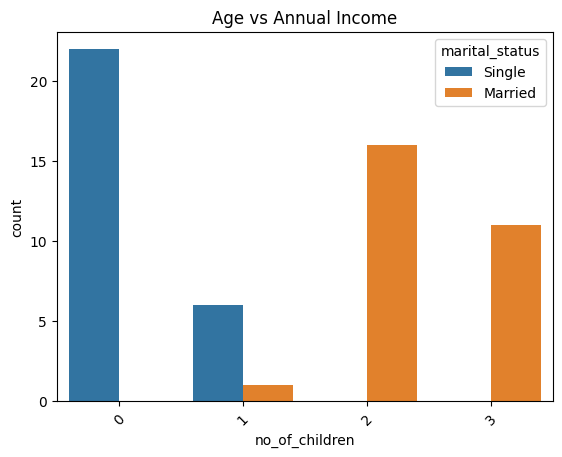

In [ ]:
#married by number of kids
sns.countplot(x='no_of_children', hue='marital_status', data=responses)
plt.title('Age vs Annual Income')
plt.xticks(rotation = 45)
plt.show()
plt.show()

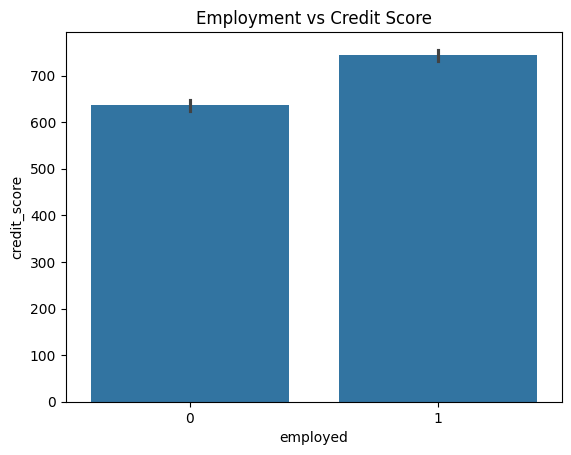

In [ ]:
#Employment vs credit score
sns.barplot(x='employed', y='credit_score',data = responses)
plt.title('Employment vs Credit Score')
plt.show()

## Feature Engineering

In [ ]:
#Convert to categorical data
responses[['marital_status','employed','gender','no_of_children','responded']] = responses[['marital_status','employed','gender','no_of_children','responded']].astype('category')
print(responses.dtypes)

customer_id          int64
age                  int64
gender            category
annual_income        int64
credit_score         int64
employed          category
marital_status    category
no_of_children    category
responded         category
dtype: object


In [ ]:
#Transformation using Label encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
responses['responded'] = encoder.fit_transform(responses['responded'])
responses['gender'] = encoder.fit_transform(responses['gender'])
responses['employed'] = encoder.fit_transform(responses['employed'])
responses['marital_status'] = encoder.fit_transform(responses['marital_status'])

print(responses.head())

   customer_id  age  gender  annual_income  credit_score  employed  \
0            1   35       1          65000           720         1   
1            2   28       0          45000           680         0   
2            3   42       1          85000           750         1   
3            4   31       0          55000           710         1   
4            5   47       1          95000           790         1   

   marital_status no_of_children  responded  
0               0              2          1  
1               1              0          0  
2               0              3          1  
3               1              1          0  
4               0              2          1  


In [ ]:
#Correlation Map
responses = responses.drop('customer_id', axis=1)
correlation_matrix = responses.corr()
correlation_matrix

,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
age,1.000000,0.859209,0.983787,0.970942,0.691117,-0.859209,0.932992,0.859209
gender,0.859209,1.000000,0.910239,0.863002,0.549841,-1.000000,0.911185,1.000000
annual_income,0.983787,0.910239,1.000000,0.978764,0.680372,-0.910239,0.955499,0.910239
credit_score,0.970942,0.863002,0.978764,1.000000,0.762734,-0.863002,0.922946,0.863002
employed,0.691117,0.549841,0.680372,0.762734,1.000000,-0.549841,0.601209,0.549841
marital_status,-0.859209,-1.000000,-0.910239,-0.863002,-0.549841,1.000000,-0.911185,-1.000000
no_of_children,0.932992,0.911185,0.955499,0.922946,0.601209,-0.911185,1.000000,0.911185
responded,0.859209,1.000000,0.910239,0.863002,0.549841,-1.000000,0.911185,1.000000


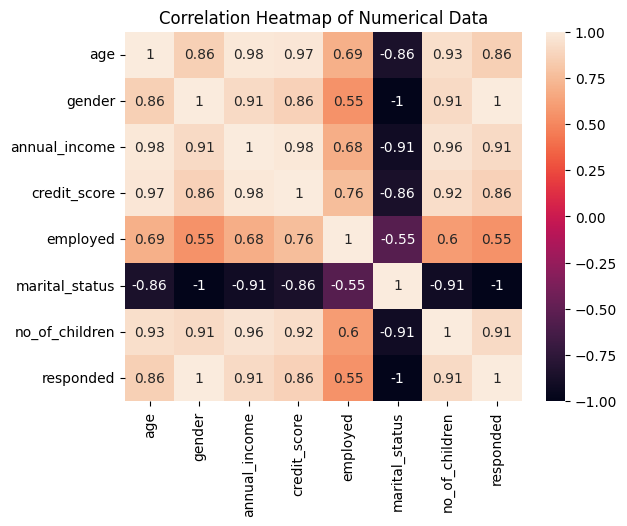

In [ ]:
#Vissualisation
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap of Numerical Data')
plt.show()

## Modelling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,roc_curve,auc,roc_auc_score,mean_absolute_error

In [ ]:
X = responses.drop('responded', axis =1)
y = responses['responded']

In [ ]:
#Splitting my data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21, stratify=y)

KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Mean absolute error: 0.0
Accuracy: 1.0
AUC: 1.0


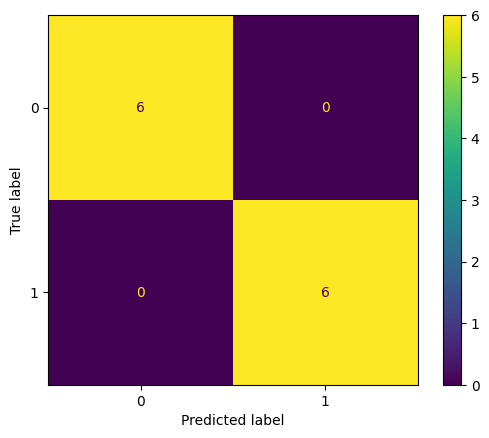

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
predict = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:,1]
print(classification_report(y_test, predict))
ConfusionMatrixDisplay(confusion_matrix(y_test, predict)).plot()
print('Mean absolute error:', mean_absolute_error(y_test,predict))
knn_score = accuracy_score(y_test,predict)
print('Accuracy:', knn_score)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_knn = auc(fpr, tpr)
print('AUC:', roc_knn)

Xgboost

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Mean absolute error: 0.0
Accuracy: 1.0
AUC: 1.0


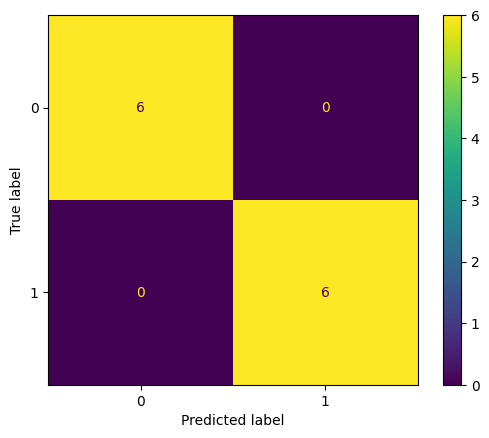

In [ ]:
xgb = XGBClassifier(enable_categorical=True)
xgb.fit(X_train,y_train)
xgb_predict = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]
print(classification_report(y_test, xgb_predict))
ConfusionMatrixDisplay(confusion_matrix(y_test, xgb_predict)).plot()
print('Mean absolute error:', mean_absolute_error(y_test,xgb_predict))
xgb_score = accuracy_score(y_test,xgb_predict)
print('Accuracy:', xgb_score)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_xgb = auc(fpr, tpr)
print('AUC:', roc_xgb)

SVC

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Mean absolute error: 0.0
Accuracy: 1.0
AUC: 1.0


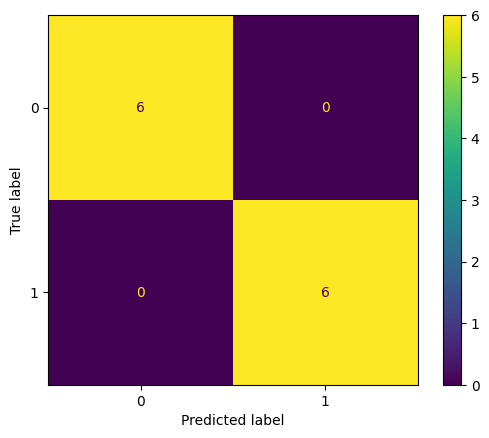

In [ ]:
svc = SVC(probability=True)
svc.fit(X_train,y_train)
predict = svc.predict(X_test)
y_prob = svc.predict_proba(X_test)[:,1]
print(classification_report(y_test, predict))
ConfusionMatrixDisplay(confusion_matrix(y_test,predict)).plot()
print('Mean absolute error:', mean_absolute_error(y_test,predict))
svc_score = accuracy_score(y_test,predict)
print('Accuracy:', svc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_svc = auc(fpr, tpr)
print('AUC:', roc_svc)


Loading Test Data

In [ ]:
#Load in the test data into our xgb model which is the best so far

test_pred  = xgb.predict(X_test)
print(test_pred)


[0 1 1 0 0 0 1 1 1 1 0 0]
